In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
label_df =pd.read_csv('./label2id.csv')

In [3]:
labels = label_df.sort_values('id').label.values
labels = [x[:2] if x is not np.nan else 'nan'  for x in labels ]

In [4]:
label_df.sort_values('id').label.values

array(['Sleeping-', nan, 'Bed_to_Toilet-', 'Meal_Preparation-', 'Relax-',
       'Housekeeping-', 'Eating-', 'Wash_Dishes-', 'Leave_Home-',
       'Enter_Home-', 'Work-', 'Resperate-', 'Housekeeping-Leave_Home-',
       'Enter_Home-Housekeeping-', 'Eating-Relax-',
       'Eating-Meal_Preparation-', 'Meal_Preparation-Relax-',
       'Leave_Home-Meal_Preparation-', 'Enter_Home-Meal_Preparation-',
       'Eating-Wash_Dishes-'], dtype=object)

In [5]:
# 今回認識対象とするラベルを指定．（簡単のため「Others」ラベルは除く）
target_label_list = ['Sleeping-', 'Bed_to_Toilet-', 'Meal_Preparation-', 'Relax-',
       'Housekeeping-', 'Eating-', 'Wash_Dishes-', 'Leave_Home-',
       'Enter_Home-', 'Work-', 'Resperate-']

In [6]:
train_fet_df = pd.read_csv('./train_fet1_df.csv', index_col=0)
train_fet_df.shape

(268687, 84)

In [7]:
target_labels = label_df[label_df.label.isin(target_label_list)].id.values

print (train_fet_df.shape)
train_fet_df = train_fet_df[train_fet_df.label.isin(target_labels)]
print (train_fet_df.shape)

(268687, 84)
(102079, 84)


In [8]:
%%time
n_train = -1
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=42, verbose=True)
clf.fit(train_fet_df.iloc[:n_train,:-1].as_matrix(), train_fet_df.label.values[:n_train]) 

[LibSVM]CPU times: user 4min 19s, sys: 1.96 s, total: 4min 21s
Wall time: 4min 21s


In [9]:
test_fet_df = pd.read_csv('./test_fet1_df.csv', index_col=0)

In [10]:
print (test_fet_df.shape)
test_fet_df = test_fet_df[test_fet_df.label.isin(target_labels)]
print (test_fet_df.shape)

(54446, 84)
(23896, 84)


In [11]:
# 予測ラベルの作成
pred = clf.predict(test_fet_df.iloc[:,:-1].as_matrix())

In [12]:
label_df[label_df.label.isin(target_label_list)].sort_values("id")

,label,id
17,Sleeping-,0
1,Bed_to_Toilet-,2
13,Meal_Preparation-,3
15,Relax-,4
9,Housekeeping-,5
2,Eating-,6
18,Wash_Dishes-,7
11,Leave_Home-,8
6,Enter_Home-,9
19,Work-,10


In [13]:
used_label_ids = sorted(list(set(train_fet_df.label)))

print (used_label_ids)

classes = label_df[label_df.id.isin(used_label_ids)].sort_values('id').label.values
classes =  [x.replace("-", "") for x in classes]

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


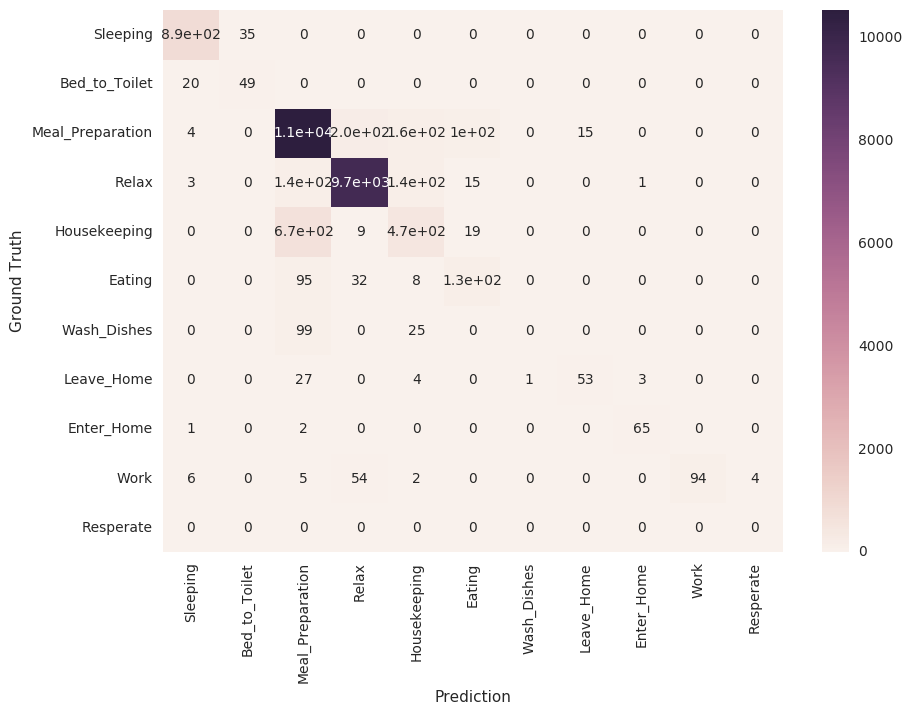

In [14]:
from sklearn.metrics import confusion_matrix
def print_cmx(y_true, y_pred, classes):
    cmx_data = confusion_matrix(y_true, y_pred )
    df_cmx = pd.DataFrame(cmx_data, index=classes, columns=classes)
    df_cmx.columns.name = "Prediction"
    df_cmx.index.name = "Ground Truth"
    
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cmx, annot=True)
    plt.show()
    
print_cmx(test_fet_df.label, pred, classes=classes)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(test_fet_df.label, pred)

0.9201540006695681